In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

,a,b,y
0,44,49,93
1,47,69,116
2,64,41,105
3,67,35,102
4,67,64,131


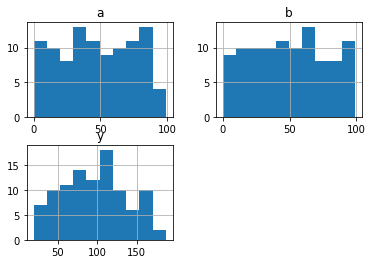

In [3]:
np.random.seed(0)
num_data = 100
a = np.random.randint(low=0, high=100, size=[num_data])
b = np.random.randint(low=0, high=100, size=[num_data])

# gen output
y = []
for i in range(len(a)):
    y.append(a[i]+b[i])
y = np.array(y).T

# display data
data = np.array([a,b,y]).T
data = pd.DataFrame(data, columns=['a','b','y'])
data.hist(bins=10)
data.head()

In [160]:
feature_a = tf.feature_column.numeric_column('a')
feature_b = tf.feature_column.numeric_column('b')
features = [feature_a, feature_b]

### 1. Train

In [228]:
input_func = tf.estimator.inputs.numpy_input_fn( x={
                                                    'a': a,
                                                    'b': b
                                                 },
                                                 y=y,
                                                 batch_size=100,
                                                 num_epochs=999999,
                                                 shuffle=True)
optimizer = tf.train.AdamOptimizer(learning_rate=0.3)
model = tf.estimator.LinearRegressor(feature_columns=features, optimizer=optimizer)
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmp6sgg8xgl', '_save_checkpoints_secs': 600, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12a567978>, '_save_checkpoints_steps': None, '_master': '', '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_session_config': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, '_evaluation_master': '', '_task_id': 0, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716

In [229]:
var_names = tf.estimator.LinearRegressor.get_variable_names(model)
for name in var_names:
    var_value = tf.estimator.LinearRegressor.get_variable_value(model, name)
    print(name, var_value)

w_a = tf.estimator.LinearRegressor.get_variable_value(model, 'linear/linear_model/a/weights')
w_b = tf.estimator.LinearRegressor.get_variable_value(model, 'linear/linear_model/b/weights')
bias = tf.estimator.LinearRegressor.get_variable_value(model, 'linear/linear_model/bias_weights')
print('weigth a :', np.asscalar(w_a))
print('weigth b :', np.asscalar(w_b))
print('weigth bias :', np.asscalar(bias))

global_step 1000
linear/beta1_power 0.0
linear/beta2_power 0.36733255
linear/linear_model/a/weights [[0.99998766]]
linear/linear_model/a/weights/part_0/Adam [[0.05541265]]
linear/linear_model/a/weights/part_0/Adam_1 [[1.4472042e+09]]
linear/linear_model/b/weights [[0.99998903]]
linear/linear_model/b/weights/part_0/Adam [[0.00813372]]
linear/linear_model/b/weights/part_0/Adam_1 [[1.5167964e+09]]
linear/linear_model/bias_weights [0.00143587]
linear/linear_model/bias_weights/part_0/Adam [0.04879072]
linear/linear_model/bias_weights/part_0/Adam_1 [462190.84]
weigth a : 0.9999876618385315
weigth b : 0.9999890327453613
weigth bias : 0.0014358730986714363


### 2. Test

In [117]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    x={
    'a': a,
    'b': b
    },
    y=y,
    batch_size=1000,
    num_epochs=1000,
    shuffle=False)
eval_metrics = model.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-07-14:37:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpq0_cqp8v/model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-07-14:37:05
INFO:tensorflow:Saving dict for global step 100000: average_loss = 0.0, global_step = 100000, loss = 0.0


### 3. Prdiction

In [118]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn(x={
    'a':np.array([1]),
    'b':np.array([2])
},shuffle=False)
predict = model.predict(input_fn=input_fn_predict)

for p in predict:
    print(p)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpq0_cqp8v/model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([3.9565265], dtype=float32)}


In [119]:
np.asscalar(w_a)*1 + np.asscalar(w_b)*2 + np.asscalar(bias)

3.000000663599792